# Pretrained Models - TF2.X

In [1]:
import tensorflow as tf
print(tf.__version__)
!python --version

2024-02-25 19:03:21.015322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0
Python 3.11.2


In [2]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

## Downloading the VGG16 model:

In [3]:
model = VGG16(weights='imagenet')

## Model Architecture:

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Loading an image:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
img_path = '/Users/apple/Documents/Projects-Python/DeepLearningCode/src/notebook/00-Prerequisites/resources/pics/dog/dog.jpg'

In [7]:
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

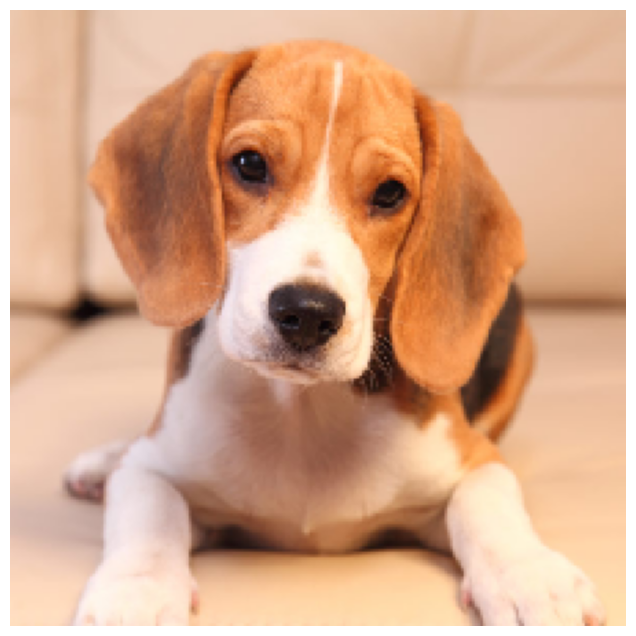

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.show()   

In [9]:
img = tf.keras.preprocessing.image.img_to_array(img)

## Reshape data for the model:

In [10]:
img.shape

(224, 224, 3)

In [11]:
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

In [12]:
img.shape

(1, 224, 224, 3)

## Make a Prediction:

In [13]:
pred = model.predict(img)

1/1 [==============================] - 1s 1s/step


## Interpret Prediction:

In [14]:
from keras.applications.vgg16 import decode_predictions

In [15]:
print('Predicted:', decode_predictions(pred, top=3)[0])

35363/35363 [==============================] - 0s 6us/step
Predicted: [('n02088364', 'beagle', 0.8920464), ('n02089973', 'English_foxhound', 0.06834429), ('n02089867', 'Walker_hound', 0.039038524)]
